# Régression linéaire en Python

L'analyse suivante traite les données issues de http://www-bcf.usc.edu/~gareth/ISL/data.html
https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

## Partie 1 Chargement des librairies et données

Chargement des librairies

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Chargement des données (le caractère '?' représente des NaN du dataset)

In [14]:
auto = pd.read_table('data/Auto.csv', sep = ',', na_values = '?')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [38]:
auto.describe(include = 'all')

E:\07_Programmation\008_Anaconda\Python\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


Calcul de la matrice de corrélaiton

In [33]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


Impact de quelques facteurs sur la consommation

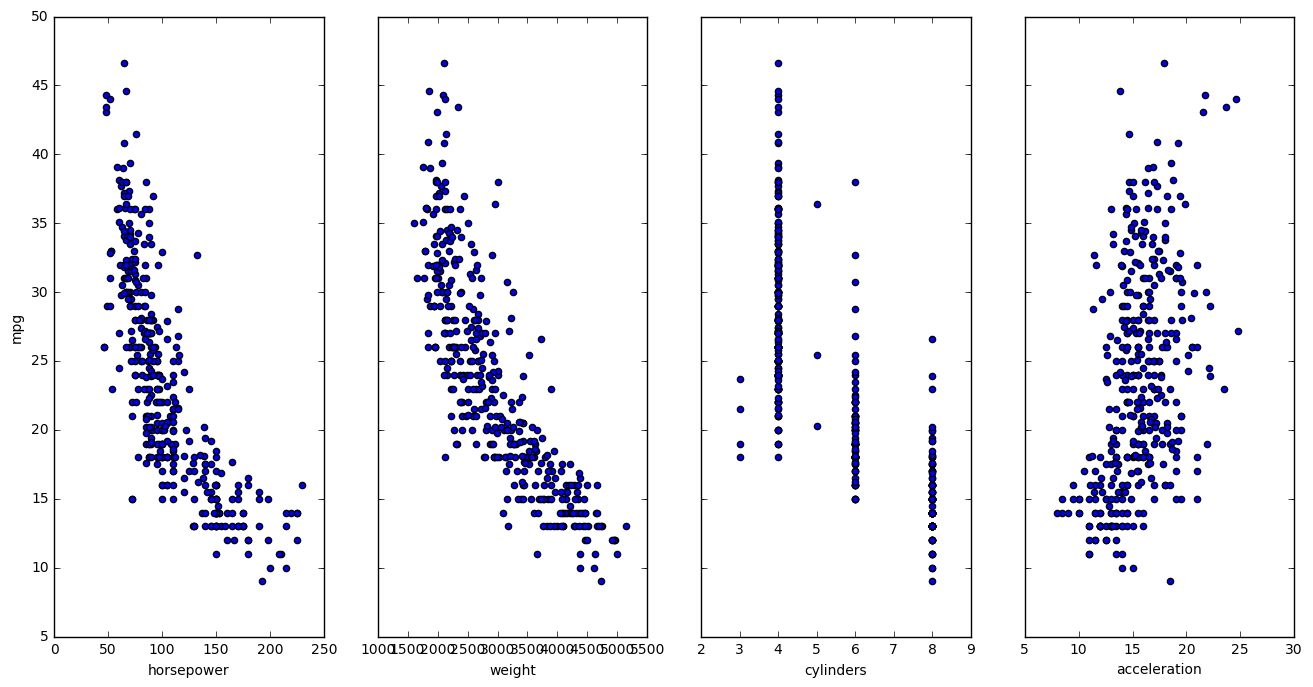

In [54]:
fig, axs = plt.subplots(1, 4, sharey=True)

auto.plot(kind='scatter', x='horsepower', y='mpg', ax=axs[0], figsize=(16, 8))

auto.plot(kind='scatter', x='weight', y='mpg', ax=axs[1])

auto.plot(kind='scatter', x='cylinders', y='mpg', ax=axs[2])

auto.plot(kind='scatter', x='acceleration', y='mpg', ax=axs[3])

La puissance fiscale, le poids et le nombre de cylindre jouent un rôle important dans la consommation. Plus ces facteurs augmentent, plus la consommation dimminue. 
En revanche, plus l'accélération augmente, plus la consommation est importante.

## Création du modèle